# Python Insights - Analisando Dados com Python

### Case - Cancelamento de Clientes

Você foi contratado por uma empresa com mais de 800 mil clientes para um projeto de Dados. Recentemente a empresa percebeu que da sua base total de clientes, a maioria são clientes inativos, ou seja, que já cancelaram o serviço.

Precisando melhorar seus resultados ela quer conseguir entender os principais motivos desses cancelamentos e quais as ações mais eficientes para reduzir esse número.

Base de dados e arquivos: https://drive.google.com/drive/folders/1uDesZePdkhiraJmiyeZ-w5tfc8XsNYFZ?usp=drive_link

In [21]:
import pandas as pd 
import plotly.express as px

tabela = pd.read_csv("../data/cancelamentos_sample.csv")

display(tabela)

,CustomerID,idade,sexo,tempo_como_cliente,frequencia_uso,ligacoes_callcenter,dias_atraso,assinatura,duracao_contrato,total_gasto,meses_ultima_interacao,cancelou
0,349936.0,23.0,Male,13.0,22.0,2.0,1.0,Standard,Annual,909.58,23.0,0.0
1,100634.0,49.0,Male,55.0,16.0,3.0,6.0,Premium,Monthly,207.00,29.0,1.0
2,301263.0,30.0,Male,7.0,1.0,0.0,8.0,Basic,Annual,768.78,7.0,0.0
3,119358.0,26.0,Male,40.0,5.0,3.0,8.0,Premium,Annual,398.00,12.0,1.0
4,130955.0,27.0,Female,17.0,30.0,5.0,6.0,Basic,Annual,507.00,15.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...
49995,195680.0,62.0,Female,35.0,7.0,2.0,8.0,Basic,Annual,232.00,15.0,1.0
49996,43477.0,36.0,Male,43.0,21.0,2.0,30.0,Basic,Quarterly,928.00,30.0,1.0
49997,169273.0,55.0,Male,42.0,8.0,1.0,12.0,Basic,Monthly,326.00,27.0,1.0
49998,310693.0,40.0,Female,14.0,19.0,1.0,17.0,Premium,Quarterly,826.76,12.0,0.0


In [22]:
tabela = tabela.drop(columns="CustomerID")
display(tabela)

,idade,sexo,tempo_como_cliente,frequencia_uso,ligacoes_callcenter,dias_atraso,assinatura,duracao_contrato,total_gasto,meses_ultima_interacao,cancelou
0,23.0,Male,13.0,22.0,2.0,1.0,Standard,Annual,909.58,23.0,0.0
1,49.0,Male,55.0,16.0,3.0,6.0,Premium,Monthly,207.00,29.0,1.0
2,30.0,Male,7.0,1.0,0.0,8.0,Basic,Annual,768.78,7.0,0.0
3,26.0,Male,40.0,5.0,3.0,8.0,Premium,Annual,398.00,12.0,1.0
4,27.0,Female,17.0,30.0,5.0,6.0,Basic,Annual,507.00,15.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...
49995,62.0,Female,35.0,7.0,2.0,8.0,Basic,Annual,232.00,15.0,1.0
49996,36.0,Male,43.0,21.0,2.0,30.0,Basic,Quarterly,928.00,30.0,1.0
49997,55.0,Male,42.0,8.0,1.0,12.0,Basic,Monthly,326.00,27.0,1.0
49998,40.0,Female,14.0,19.0,1.0,17.0,Premium,Quarterly,826.76,12.0,0.0


In [23]:
tabela.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   idade                   50000 non-null  float64
 1   sexo                    49997 non-null  object 
 2   tempo_como_cliente      49998 non-null  float64
 3   frequencia_uso          50000 non-null  float64
 4   ligacoes_callcenter     50000 non-null  float64
 5   dias_atraso             50000 non-null  float64
 6   assinatura              50000 non-null  object 
 7   duracao_contrato        50000 non-null  object 
 8   total_gasto             50000 non-null  float64
 9   meses_ultima_interacao  50000 non-null  float64
 10  cancelou                50000 non-null  float64
dtypes: float64(8), object(3)
memory usage: 4.2+ MB


In [24]:
tabela = tabela.dropna()
display(tabela)
tabela.info()

,idade,sexo,tempo_como_cliente,frequencia_uso,ligacoes_callcenter,dias_atraso,assinatura,duracao_contrato,total_gasto,meses_ultima_interacao,cancelou
0,23.0,Male,13.0,22.0,2.0,1.0,Standard,Annual,909.58,23.0,0.0
1,49.0,Male,55.0,16.0,3.0,6.0,Premium,Monthly,207.00,29.0,1.0
2,30.0,Male,7.0,1.0,0.0,8.0,Basic,Annual,768.78,7.0,0.0
3,26.0,Male,40.0,5.0,3.0,8.0,Premium,Annual,398.00,12.0,1.0
4,27.0,Female,17.0,30.0,5.0,6.0,Basic,Annual,507.00,15.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...
49995,62.0,Female,35.0,7.0,2.0,8.0,Basic,Annual,232.00,15.0,1.0
49996,36.0,Male,43.0,21.0,2.0,30.0,Basic,Quarterly,928.00,30.0,1.0
49997,55.0,Male,42.0,8.0,1.0,12.0,Basic,Monthly,326.00,27.0,1.0
49998,40.0,Female,14.0,19.0,1.0,17.0,Premium,Quarterly,826.76,12.0,0.0


<class 'pandas.core.frame.DataFrame'>
Index: 49996 entries, 0 to 49999
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   idade                   49996 non-null  float64
 1   sexo                    49996 non-null  object 
 2   tempo_como_cliente      49996 non-null  float64
 3   frequencia_uso          49996 non-null  float64
 4   ligacoes_callcenter     49996 non-null  float64
 5   dias_atraso             49996 non-null  float64
 6   assinatura              49996 non-null  object 
 7   duracao_contrato        49996 non-null  object 
 8   total_gasto             49996 non-null  float64
 9   meses_ultima_interacao  49996 non-null  float64
 10  cancelou                49996 non-null  float64
dtypes: float64(8), object(3)
memory usage: 4.6+ MB


In [25]:
tabela["cancelou"].value_counts()

cancelou
1.0    28393
0.0    21603
Name: count, dtype: int64

In [26]:
tabela["cancelou"].value_counts(normalize=True)

cancelou
1.0    0.567905
0.0    0.432095
Name: proportion, dtype: float64

In [27]:
tabela["assinatura"].value_counts()

assinatura
Standard    17063
Premium     16637
Basic       16296
Name: count, dtype: int64

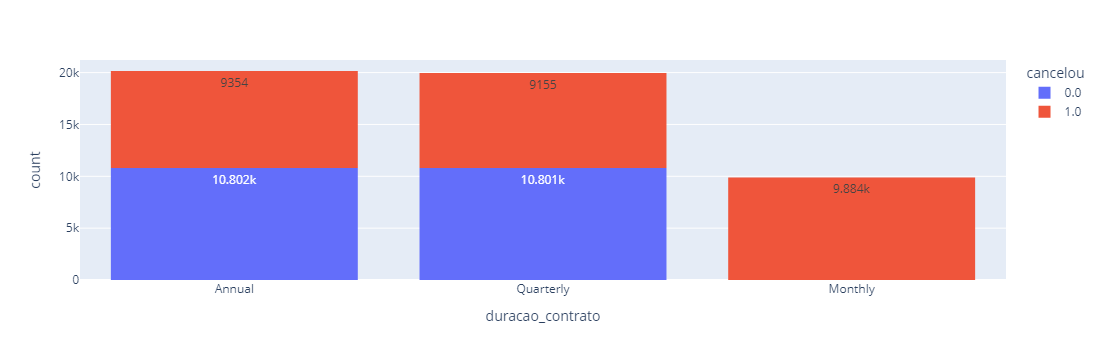

In [30]:
grafico = px.histogram(tabela, x="duracao_contrato", color="cancelou", text_auto=True)
grafico.show()